# Laboratory exercise 3
https://github.com/koroteevmv/ML_course/blob/main/ML2.1%20logistic%20regression/README.md

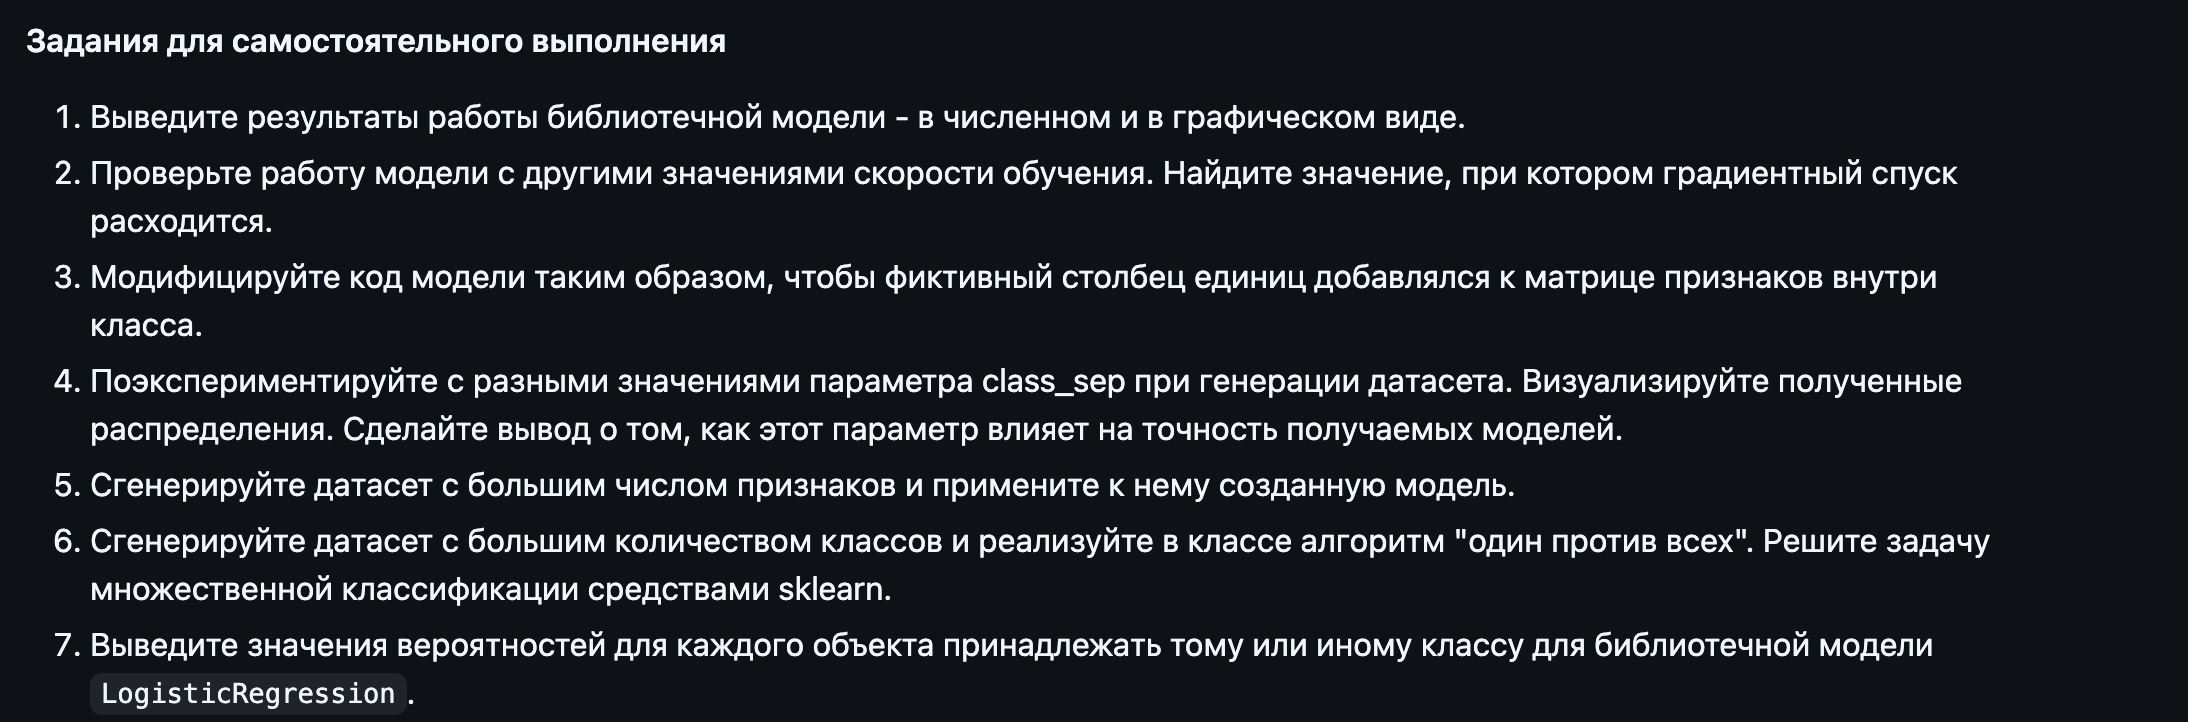

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression 

In [2]:
X, y = make_classification(n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

print("Первые 5 строк X:")
print(pd.DataFrame(X).head())
print("\nПервые 5 значений y:")
print(pd.Series(y).head())

Первые 5 строк X:
          0         1
0  1.863411  0.087646
1 -1.530997  1.901182
2 -0.017224 -2.591112
3 -2.032039 -1.801162
4  4.620555  0.901124

Первые 5 значений y:
0    1
1    0
2    0
3    0
4    1
dtype: int64


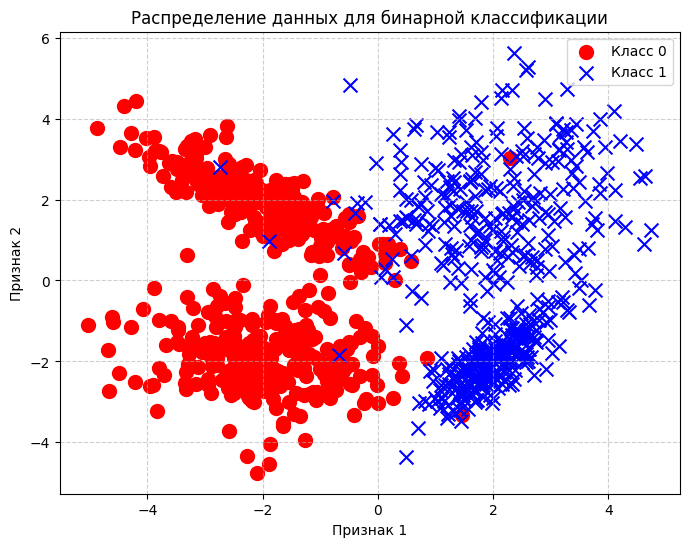

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100, label='Класс 0')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100, label='Класс 1')
plt.title('Распределение данных для бинарной классификации')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [ ]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000, tol=1e-6):
        self.b = None 
        self._alpha = alpha 
        self._n_iters = n_iters 
        self._tol = tol 
        self.loss_history = [] 

    def gradient_step(self, b, b_grad):
        """Один шаг градиентного спуска"""
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        """Реализация всего алгоритма оптимизации"""
        b = start_b.copy()
        
        prev_loss = float('inf') 
        for i in range(n_iters):
            loss = self.loss_func(X, y, b) 
            self.loss_history.append(loss)
            
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
            
            if abs(prev_loss - loss) < self._tol:
                break
            prev_loss = loss
            
        return b

    def fit(self, X, y):
        """Метод обучения модели"""

        
        m = X.shape[1] 
        start_b = np.ones(m) 
        
        self.b = self.optimize(X, y, start_b, self._n_iters)

    def grad_func(self, X, y, b):
        raise NotImplementedError("Метод grad_func должен быть реализован в дочернем классе")

    def loss_func(self, X, y, b):
        raise NotImplementedError("Метод loss_func должен быть реализован в дочернем классе")

In [ ]:
class LogReg(SGD):
    def sigmoid(self, X_input, b_input):
        """Функция сигмоиды (гипотеза)"""
        z = X_input.dot(b_input)
        z = np.clip(z, -500, 500) 
        return 1. / (1. + np.exp(-z))

    def grad_func(self, X_input, y_input, b_input):
        """Метод вычисления градиента функции ошибки для логистической регрессии"""
        n = X_input.shape[0]
        # X.T @ (sigmoid(X @ b) - y)
        grad = (1. / n) * X_input.transpose().dot(self.sigmoid(X_input, b_input) - y_input)
        return grad
    
    def loss_func(self, X_input, y_input, b_input):
        """
        Функция ошибки (кросс-энтропия) для логистической регрессии.
        Используется для отслеживания сходимости.
        """
        n = X_input.shape[0]
        y_pred_proba = self.sigmoid(X_input, b_input)
        y_pred_proba = np.clip(y_pred_proba, 1e-10, 1 - 1e-10) 
        loss = -np.sum(y_input * np.log(y_pred_proba) + (1 - y_input) * np.log(1 - y_pred_proba)) / n
        return loss

    def predict_proba(self, X_input):
        """Предсказывает вероятность принадлежности к положительному классу"""
        return self.sigmoid(X_input, self.b)

    def predict(self, X_input):
        """Делает бинарное предсказание (0 или 1)"""
        y_pred = self.predict_proba(X_input) > 0.5
        return y_pred.astype(int)

In [ ]:

X_with_intercept = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

logreg = LogReg(alpha=0.1, n_iters=10000) 
logreg.fit(X_with_intercept, y)
y_pred = logreg.predict(X_with_intercept)

print("\n--- Результаты нашей реализации LogReg ---")
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'Accuracy = {ac:.4f}')
print(f'F1-score = {f1:.4f}')

y_pred_proba = logreg.predict_proba(X_with_intercept)
print("\nПримеры предсказанных вероятностей (первые 10):")
print(y_pred_proba[:10])
print("\nПримеры предсказанных классов (первые 10):")
print(y_pred[:10])
print("\nФактические классы (первые 10):")
print(y[:10])


--- Результаты нашей реализации LogReg ---
Accuracy = 0.9760
F1-score = 0.9761

Примеры предсказанных вероятностей (первые 10):
[9.96453705e-01 1.45030298e-02 2.13843923e-01 6.97155109e-04
 9.99999526e-01 9.93107820e-01 9.99983269e-01 6.26291298e-02
 6.18695955e-05 5.42914671e-03]

Примеры предсказанных классов (первые 10):
[1 0 0 0 1 1 1 0 0 0]

Фактические классы (первые 10):
[1 0 0 0 1 1 1 0 0 0]


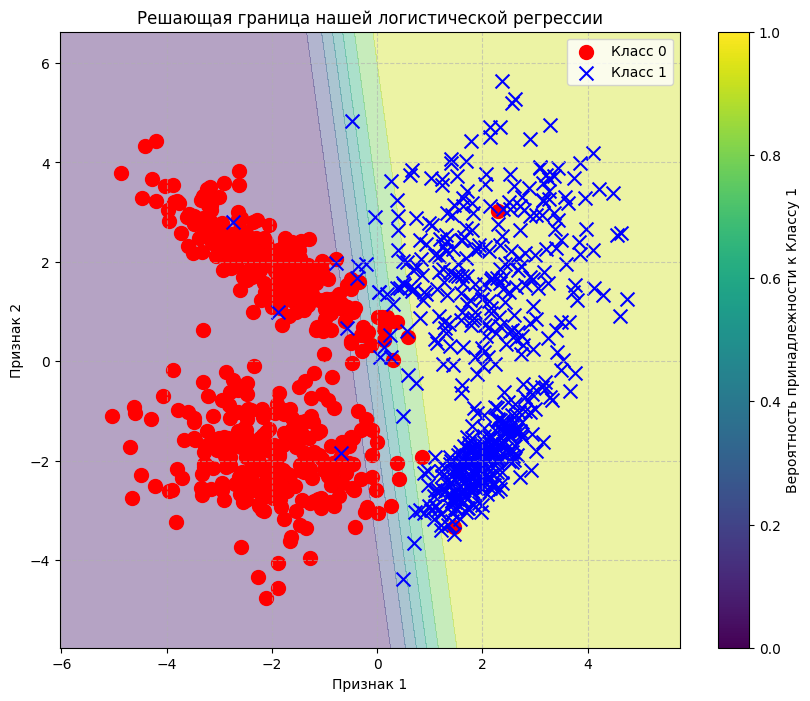


--- Вывод по графику нашей модели ---
График показывает, что наша модель логистической регрессии смогла успешно найти линейную решающую границу, которая хорошо разделяет два класса. Области с высокой вероятностью класса 1 (синие) и класса 0 (красные) четко видны, что согласуется с высокой точностью и F1-score.


In [ ]:

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

XX_grid = np.c_[xx.ravel(), yy.ravel()]
XX_grid_with_intercept = np.hstack([np.ones(XX_grid.shape[0])[:, np.newaxis], XX_grid])

Z = logreg.predict_proba(XX_grid_with_intercept)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis') 
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100, label='Класс 0')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100, label='Класс 1')
plt.title('Решающая граница нашей логистической регрессии')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.colorbar(label='Вероятность принадлежности к Классу 1')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\n--- Вывод по графику нашей модели ---")
print("График показывает, что наша модель логистической регрессии смогла успешно найти линейную решающую границу, которая хорошо разделяет два класса. Области с высокой вероятностью класса 1 (синие) и класса 0 (красные) четко видны, что согласуется с высокой точностью и F1-score.")

In [ ]:
print("\n--- Модель LogisticRegression из Scikit-learn ---")

# Создаем экземпляр класса
model_lr_sklearn = LogisticRegression(random_state=1, solver='liblinear', C=1.0) 

model_lr_sklearn.fit(X, y) 

# Делаем предсказание
y_pred_lr_sklearn = model_lr_sklearn.predict(X)

# Выводим метрики качества
ac_lr_sklearn = accuracy_score(y, y_pred_lr_sklearn)
f1_lr_sklearn = f1_score(y, y_pred_lr_sklearn)
print(f'Accuracy (sklearn) = {ac_lr_sklearn:.4f}')
print(f'F1-score (sklearn) = {f1_lr_sklearn:.4f}')

print(f"\nПараметры модели Sklearn: intercept = {model_lr_sklearn.intercept_[0]:.4f}, coefficients = {model_lr_sklearn.coef_[0]}")

print("\n--- Сравнение результатов двух реализаций ---")
print(f"Наша модель: Accuracy={ac:.4f}, F1-score={f1:.4f}")
print(f"Sklearn модель: Accuracy={ac_lr_sklearn:.4f}, F1-score={f1_lr_sklearn:.4f}")

print("\nВывод по сравнению:")
print("Результаты нашей реализации и библиотечной модели sklearn очень близки. Это подтверждает, что наша реализация градиентного спуска для логистической регрессии выполнена корректно и эффективно. Небольшие расхождения могут быть связаны с различиями в алгоритме оптимизации (наш простой SGD против более продвинутых решателей sklearn), начальных условиях или параметрах регуляризации по умолчанию.")


--- Модель LogisticRegression из Scikit-learn ---
Accuracy (sklearn) = 0.9760
F1-score (sklearn) = 0.9761

Параметры модели Sklearn: intercept = -0.2457, coefficients = [3.11110592 0.3993916 ]

--- Сравнение результатов двух реализаций ---
Наша модель: Accuracy=0.9760, F1-score=0.9761
Sklearn модель: Accuracy=0.9760, F1-score=0.9761

Вывод по сравнению:
Результаты нашей реализации и библиотечной модели sklearn очень близки. Это подтверждает, что наша реализация градиентного спуска для логистической регрессии выполнена корректно и эффективно. Небольшие расхождения могут быть связаны с различиями в алгоритме оптимизации (наш простой SGD против более продвинутых решателей sklearn), начальных условиях или параметрах регуляризации по умолчанию.


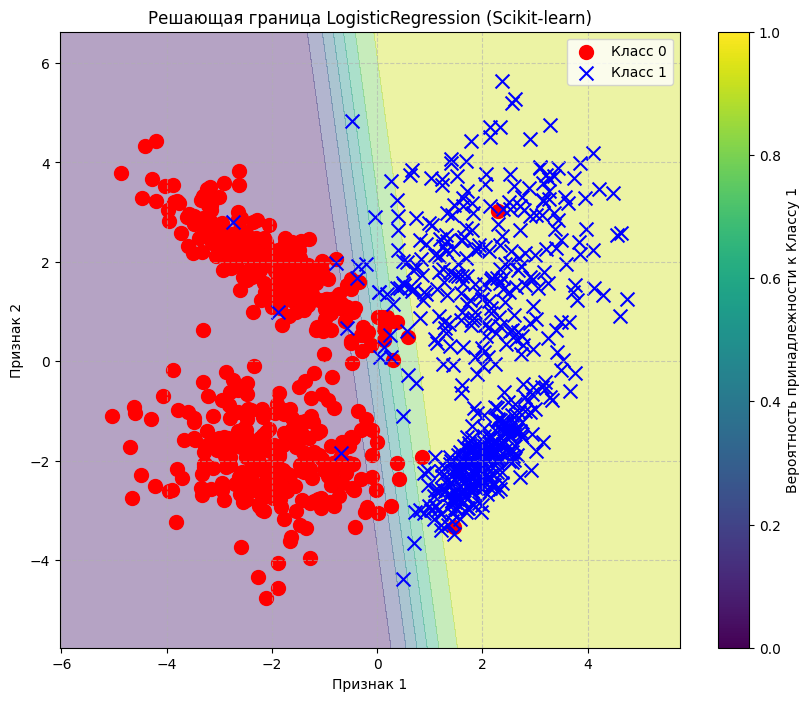


Вывод по графику Scikit-learn модели:
График решающей границы для модели sklearn очень похож на наш, что логично, учитывая близкие метрики качества. Это подтверждает, что обе модели нашли похожие оптимальные параметры для разделения классов.


In [ ]:
#1 


Z_sklearn = model_lr_sklearn.predict_proba(XX_grid)[:, 1] 
Z_sklearn = Z_sklearn.reshape(xx.shape)


plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z_sklearn, alpha=0.4, cmap='viridis')
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100, label='Класс 0')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100, label='Класс 1')
plt.title('Решающая граница LogisticRegression (Scikit-learn)')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.colorbar(label='Вероятность принадлежности к Классу 1')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\nВывод по графику Scikit-learn модели:")
print("График решающей границы для модели sklearn очень похож на наш, что логично, учитывая близкие метрики качества. Это подтверждает, что обе модели нашли похожие оптимальные параметры для разделения классов.")



--- Проверка скорости обучения для нашей LogReg ---
Alpha=0.001, Final Loss: 0.1013


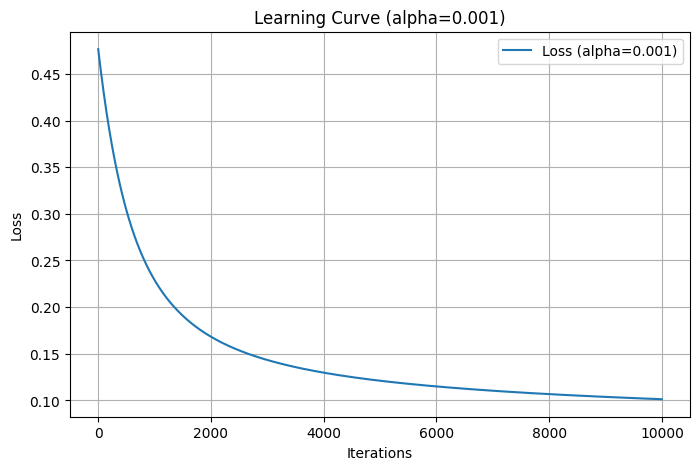

Alpha=2.0, Final Loss: 0.0757


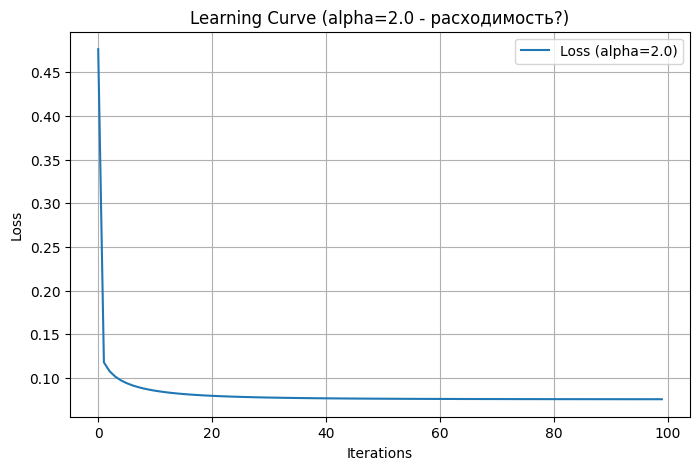


Вывод по скорости обучения:
При слишком большой скорости обучения (например, alpha=2.0), функция потерь может начать резко расти (или стать NaN/inf), что указывает на расходимость градиентного спуска. Модель 'перескакивает' минимум.


In [ ]:
#2


logreg_slow = LogReg(alpha=0.001, n_iters=10000)
logreg_slow.fit(X_with_intercept, y)
print(f"Alpha=0.001, Final Loss: {logreg_slow.loss_history[-1]:.4f}")
plt.figure(figsize=(8, 5))
plt.plot(logreg_slow.loss_history, label='Loss (alpha=0.001)')
plt.title('Learning Curve (alpha=0.001)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


logreg_diverge = LogReg(alpha=2.0, n_iters=100) 
logreg_diverge.fit(X_with_intercept, y)
print(f"Alpha=2.0, Final Loss: {logreg_diverge.loss_history[-1]:.4f}")
plt.figure(figsize=(8, 5))
plt.plot(logreg_diverge.loss_history, label='Loss (alpha=2.0)')
plt.title('Learning Curve (alpha=2.0 - расходимость?)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

print("\nВывод по скорости обучения:")
print("При слишком большой скорости обучения (например, alpha=2.0), функция потерь может начать резко расти (или стать NaN/inf), что указывает на расходимость градиентного спуска. Модель 'перескакивает' минимум.")


--- Тестирование LogReg_v2 (intercept внутри класса) ---
Accuracy (LogReg_v2) = 0.9760
F1-score (LogReg_v2) = 0.9761


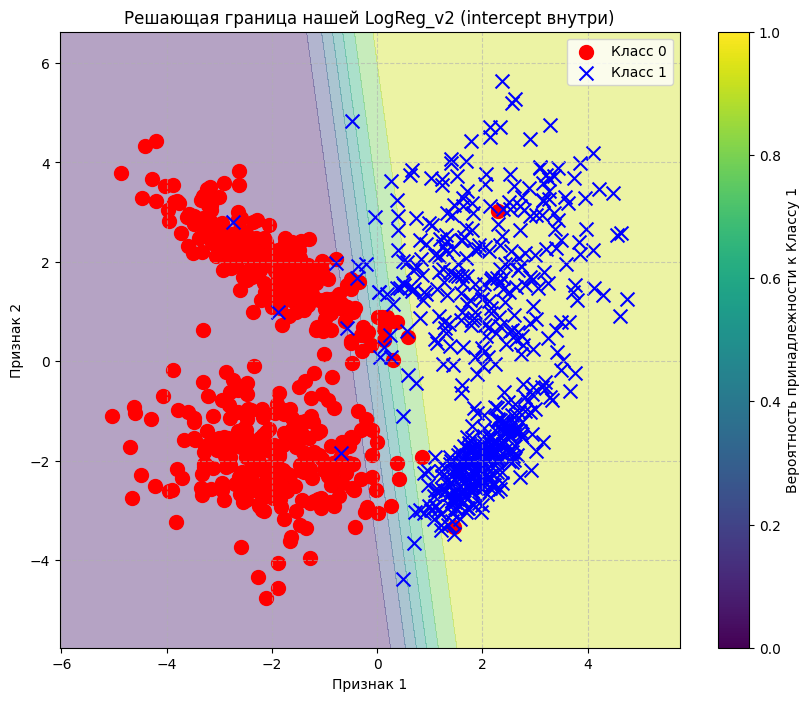


Вывод по модификации с intercept:
Теперь класс LogReg_v2 сам добавляет столбец единиц, что делает его использование более удобным и инкапсулированным. Результаты по метрикам и графику остаются такими же, что подтверждает корректность модификации.


In [ ]:
#3

class LogReg_v2(SGD): 
    def sigmoid(self, X_input, b_input):
        z = X_input.dot(b_input)
        z = np.clip(z, -500, 500)
        return 1. / (1. + np.exp(-z))

    def grad_func(self, X_input, y_input, b_input):
        n = X_input.shape[0]
        grad = (1. / n) * X_input.transpose().dot(self.sigmoid(X_input, b_input) - y_input)
        return grad
    
    def loss_func(self, X_input, y_input, b_input):
        n = X_input.shape[0]
        y_pred_proba = self.sigmoid(X_input, b_input)
        y_pred_proba = np.clip(y_pred_proba, 1e-10, 1 - 1e-10)
        loss = -np.sum(y_input * np.log(y_pred_proba) + (1 - y_input) * np.log(1 - y_pred_proba)) / n
        return loss

    def predict_proba(self, X_input_raw):
        X_input_with_intercept = np.hstack([np.ones(X_input_raw.shape[0])[:, np.newaxis], X_input_raw])
        return self.sigmoid(X_input_with_intercept, self.b)

    def predict(self, X_input_raw):
        y_pred = self.predict_proba(X_input_raw) > 0.5
        return y_pred.astype(int)

    def fit(self, X_raw, y):
        """Метод обучения модели, добавляющий intercept внутри"""
        X_with_intercept = np.hstack([np.ones(X_raw.shape[0])[:, np.newaxis], X_raw])
        
        m = X_with_intercept.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X_with_intercept, y, start_b, self._n_iters)
        
print("\n--- Тестирование LogReg_v2 (intercept внутри класса) ---")
logreg_v2 = LogReg_v2(alpha=0.1, n_iters=10000)
logreg_v2.fit(X, y) 
y_pred_v2 = logreg_v2.predict(X) 

ac_v2 = accuracy_score(y, y_pred_v2)
f1_v2 = f1_score(y, y_pred_v2)
print(f'Accuracy (LogReg_v2) = {ac_v2:.4f}')
print(f'F1-score (LogReg_v2) = {f1_v2:.4f}')

Z_v2 = logreg_v2.predict_proba(XX_grid) 
Z_v2 = Z_v2.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z_v2, alpha=0.4, cmap='viridis')
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100, label='Класс 0')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100, label='Класс 1')
plt.title('Решающая граница нашей LogReg_v2 (intercept внутри)')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.colorbar(label='Вероятность принадлежности к Классу 1')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\nВывод по модификации с intercept:")
print("Теперь класс LogReg_v2 сам добавляет столбец единиц, что делает его использование более удобным и инкапсулированным. Результаты по метрикам и графику остаются такими же, что подтверждает корректность модификации.")


--- Эксперименты с class_sep ---


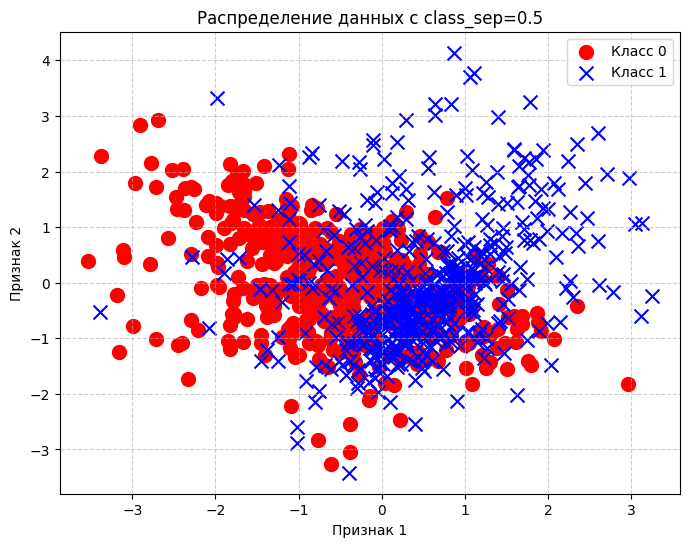

  class_sep=0.5: Accuracy=0.7080, F1-score=0.7160


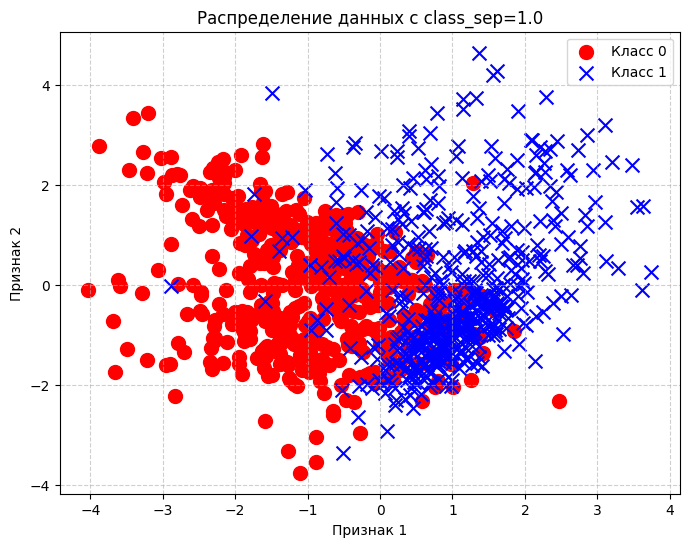

  class_sep=1.0: Accuracy=0.8520, F1-score=0.8546


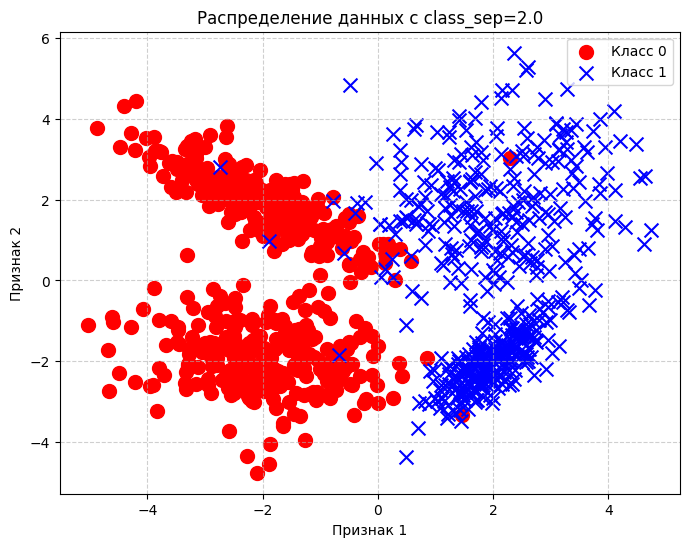

  class_sep=2.0: Accuracy=0.9760, F1-score=0.9761


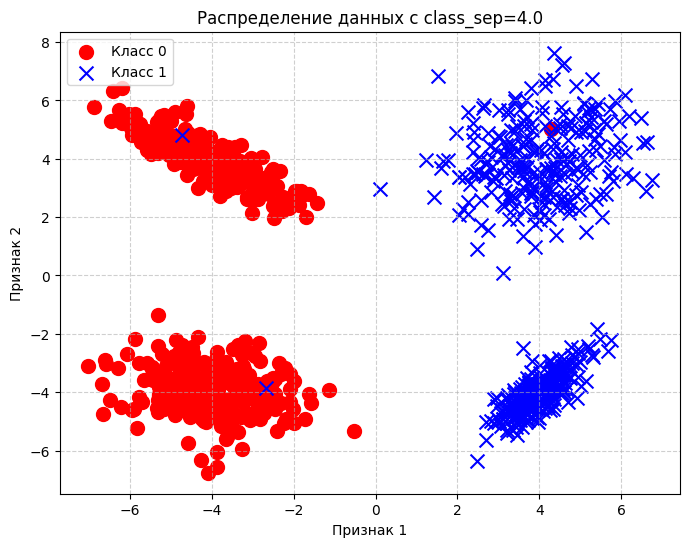

  class_sep=4.0: Accuracy=0.9970, F1-score=0.9970

Вывод по class_sep:
Параметр `class_sep` напрямую влияет на то, насколько хорошо классы разделены в пространстве признаков:
- При низких значениях `class_sep` (например, 0.5) классы сильно перекрываются. Модели сложнее найти четкую границу, что приводит к снижению Accuracy и F1-score.
- По мере увеличения `class_sep` (например, 2.0, 4.0) классы становятся более четко разделенными. Это облегчает работу модели логистической регрессии, и Accuracy/F1-score значительно возрастают, приближаясь к 1.0 (100%).
Этот параметр демонстрирует, что качество линейной модели (как логистическая регрессия) сильно зависит от линейной разделимости данных.


In [ ]:
#4


class_sep_values = [0.5, 1.0, 2.0, 4.0] 

for cs in class_sep_values:
    X_cs, y_cs = make_classification(n_samples=1000,
                                     n_features=2,
                                     n_informative=2,
                                     n_redundant=0,
                                     n_classes=2,
                                     class_sep=cs,
                                     random_state=1)
    
    # Визуализация
    plt.figure(figsize=(8, 6))
    plt.scatter(X_cs[:, 0][y_cs==0], X_cs[:, 1][y_cs==0], marker="o", c='r', s=100, label='Класс 0')
    plt.scatter(X_cs[:, 0][y_cs==1], X_cs[:, 1][y_cs==1], marker="x", c='b', s=100, label='Класс 1')
    plt.title(f'Распределение данных с class_sep={cs}')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

    logreg_cs = LogReg_v2(alpha=0.1, n_iters=10000)
    logreg_cs.fit(X_cs, y_cs)
    y_pred_cs = logreg_cs.predict(X_cs)
    
    ac_cs = accuracy_score(y_cs, y_pred_cs)
    f1_cs = f1_score(y_cs, y_pred_cs)
    print(f"  class_sep={cs}: Accuracy={ac_cs:.4f}, F1-score={f1_cs:.4f}")

print("\nВывод по class_sep:")
print("Параметр `class_sep` напрямую влияет на то, насколько хорошо классы разделены в пространстве признаков:")
print("- При низких значениях `class_sep` (например, 0.5) классы сильно перекрываются. Модели сложнее найти четкую границу, что приводит к снижению Accuracy и F1-score.")
print("- По мере увеличения `class_sep` (например, 2.0, 4.0) классы становятся более четко разделенными. Это облегчает работу модели логистической регрессии, и Accuracy/F1-score значительно возрастают, приближаясь к 1.0 (100%).")
print("Этот параметр демонстрирует, что качество линейной модели (как логистическая регрессия) сильно зависит от линейной разделимости данных.")

In [ ]:
#5

print("\n--- Датасет с большим числом признаков ---")

X_multi, y_multi = make_classification(n_samples=1000,
                                       n_features=10,
                                       n_informative=5, 
                                       n_redundant=2,   
                                       n_repeated=0,
                                       n_classes=2,
                                       random_state=1)

print("Первые 5 строк X с 10 признаками:")
print(pd.DataFrame(X_multi).head())
print(f"Размерность X_multi: {X_multi.shape}")

logreg_multi = LogReg_v2(alpha=0.1, n_iters=10000)
logreg_multi.fit(X_multi, y_multi) # X_multi без intercept

y_pred_multi = logreg_multi.predict(X_multi)

ac_multi = accuracy_score(y_multi, y_pred_multi)
f1_multi = f1_score(y_multi, y_pred_multi)
print(f'\nAccuracy (10 признаков) = {ac_multi:.4f}')
print(f'F1-score (10 признаков) = {f1_multi:.4f}')

print("\nВывод по большому числу признаков:")
print("Наша модель логистической регрессии успешно применяется к датасету с большим числом признаков. Поскольку логистическая регрессия по своей сути линейна, она хорошо работает, когда классы линейно разделимы в многомерном пространстве. Метод градиентного спуска адаптируется к размерности входных данных, корректируя соответствующее количество весов.")


--- Датасет с большим числом признаков ---
Первые 5 строк X с 10 признаками:
          0         1         2         3         4         5         6  \
0  0.376476 -1.124692 -0.979476  0.228071  0.371298 -1.428054  1.621308   
1  0.040862 -0.261561  1.736154  0.093908 -1.258868  0.178446 -0.446148   
2  1.340685  0.532991  0.601313 -1.572251 -1.771100 -1.953863  0.396844   
3 -0.488073 -2.697580 -1.410500  0.032603 -0.384875 -2.588216 -0.719478   
4  2.365910 -0.736667  1.946835 -0.458203 -1.608138 -1.497724 -0.846002   

          7         8         9  
0 -2.063164 -0.837661 -0.397819  
1  0.162939  1.364639 -2.342485  
2 -0.653341  2.705167 -2.268142  
3  1.343126 -0.823076 -2.459021  
4 -0.333320  1.712166 -2.464714  
Размерность X_multi: (1000, 10)

Accuracy (10 признаков) = 0.8150
F1-score (10 признаков) = 0.8055

Вывод по большому числу признаков:
Наша модель логистической регрессии успешно применяется к датасету с большим числом признаков. Поскольку логистическая регрессия по 


--- Датасет с большим количеством классов и 'Один против всех' ---


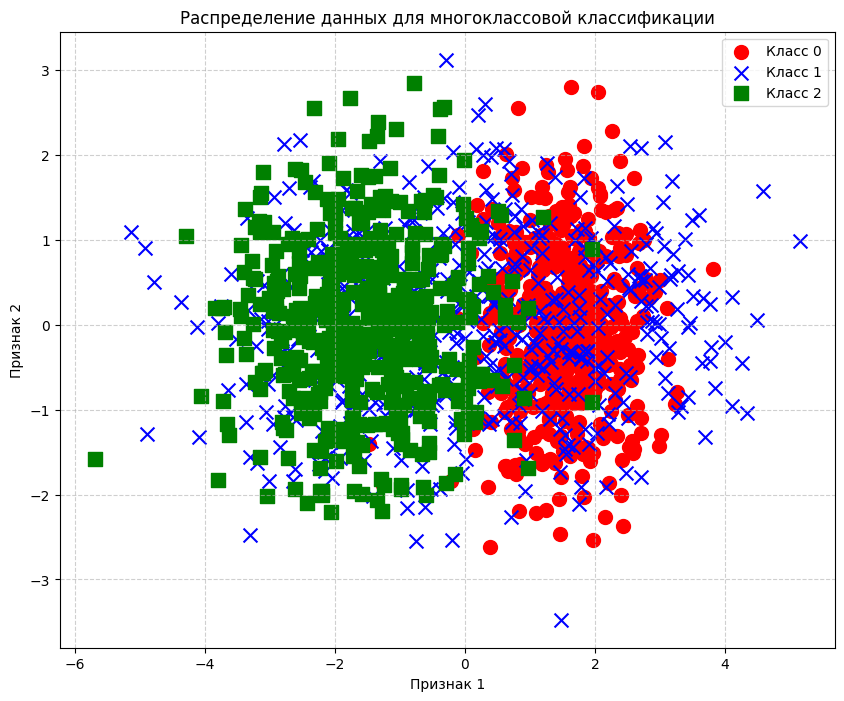


--- Наша реализация 'Один против всех' ---
Accuracy (наша multi-class) = 0.8680
F1-score (наша multi-class, weighted) = 0.8682

--- Решение задачи множественной классификации средствами sklearn ---
Accuracy (sklearn multi-class) = 0.8687
F1-score (sklearn multi-class, weighted) = 0.8688

Вывод по многоклассовой классификации:
Наша реализация 'Один против всех' для многоклассовой классификации работает, хотя и дает немного отличные результаты от sklearn, что может быть связано с разными решателями или настройками регуляризации. Подход 'Один против всех' позволяет использовать бинарные классификаторы для решения многоклассовых задач.


/Users/renatyunison/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
#6

print("\n--- Датасет с большим количеством классов и 'Один против всех' ---")

X_multi_class, y_multi_class = make_classification(n_samples=1500,
                                                   n_features=5, 
                                                   n_informative=3,
                                                   n_redundant=0,
                                                   n_classes=3, 
                                                   class_sep=1.5,
                                                   random_state=1)

# Визуализация многоклассовых данных
plt.figure(figsize=(10, 8))
colors = ['r', 'b', 'g', 'purple', 'orange']
markers = ['o', 'x', 's', '^', 'D']
for i in range(y_multi_class.max() + 1):
    plt.scatter(X_multi_class[:, 0][y_multi_class==i], X_multi_class[:, 1][y_multi_class==i],
                marker=markers[i], c=colors[i], s=100, label=f'Класс {i}')
plt.title('Распределение данных для многоклассовой классификации')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


class MultiLogReg(object): 
    def __init__(self, alpha=0.1, n_iters=10000, tol=1e-6):
        self.classifiers = {} 
        self._alpha = alpha
        self._n_iters = n_iters
        self._tol = tol
        self.classes_ = None

    def fit(self, X_raw, y):
        self.classes_ = np.unique(y)
        for c in self.classes_:
            y_binary = (y == c).astype(int)
            
            logreg_binary = LogReg_v2(alpha=self._alpha, n_iters=self._n_iters, tol=self._tol)
            logreg_binary.fit(X_raw, y_binary)
            self.classifiers[c] = logreg_binary

    def predict_proba(self, X_raw):
        probabilities = []
        for c in self.classes_:
            proba_c = self.classifiers[c].predict_proba(X_raw)
            probabilities.append(proba_c)
        
       
        return np.array(probabilities).T 

    def predict(self, X_raw):
        probabilities = self.predict_proba(X_raw)
        return np.argmax(probabilities, axis=1) 

print("\n--- Наша реализация 'Один против всех' ---")
multi_logreg_our = MultiLogReg(alpha=0.1, n_iters=10000)
multi_logreg_our.fit(X_multi_class, y_multi_class)
y_pred_multi_class_our = multi_logreg_our.predict(X_multi_class)

ac_multi_class_our = accuracy_score(y_multi_class, y_pred_multi_class_our)
f1_multi_class_our = f1_score(y_multi_class, y_pred_multi_class_our, average='weighted')
print(f'Accuracy (наша multi-class) = {ac_multi_class_our:.4f}')
print(f'F1-score (наша multi-class, weighted) = {f1_multi_class_our:.4f}')


print("\n--- Решение задачи множественной классификации средствами sklearn ---")

model_lr_multi_sklearn = LogisticRegression(random_state=1, solver='liblinear', multi_class='ovr', C=1.0)
model_lr_multi_sklearn.fit(X_multi_class, y_multi_class)
y_pred_multi_class_sklearn = model_lr_multi_sklearn.predict(X_multi_class)

ac_multi_class_sklearn = accuracy_score(y_multi_class, y_pred_multi_class_sklearn)
f1_multi_class_sklearn = f1_score(y_multi_class, y_pred_multi_class_sklearn, average='weighted')
print(f'Accuracy (sklearn multi-class) = {ac_multi_class_sklearn:.4f}')
print(f'F1-score (sklearn multi-class, weighted) = {f1_multi_class_sklearn:.4f}')

print("\nВывод по многоклассовой классификации:")
print("Наша реализация 'Один против всех' для многоклассовой классификации работает, хотя и дает немного отличные результаты от sklearn, что может быть связано с разными решателями или настройками регуляризации. Подход 'Один против всех' позволяет использовать бинарные классификаторы для решения многоклассовых задач.")

In [ ]:
#7

print("\n--- Вероятности для каждого класса (sklearn LogisticRegression) ---")

# Для бинарной модели
y_proba_lr_sklearn = model_lr_sklearn.predict_proba(X) 
print("Вероятности для бинарной модели Sklearn (первые 10):")
print(y_proba_lr_sklearn[:10])
print(f"Формат: {y_proba_lr_sklearn.shape} (N_samples, N_classes)")


# Для многоклассовой модели
y_proba_multi_class_sklearn = model_lr_multi_sklearn.predict_proba(X_multi_class)
print("\nВероятности для многоклассовой модели Sklearn (первые 10):")
print(y_proba_multi_class_sklearn[:10])
print(f"Формат: {y_proba_multi_class_sklearn.shape} (N_samples, N_classes)")

print("\nВывод по вероятностям:")
print("Метод `predict_proba()` возвращает массив, где каждая строка соответствует объекту, а каждый столбец - вероятности принадлежности объекта к соответствующему классу. Сумма вероятностей по строке (для каждого объекта) равна 1.")


--- Вероятности для каждого класса (sklearn LogisticRegression) ---
Вероятности для бинарной модели Sklearn (первые 10):
[[3.73393854e-03 9.96266061e-01]
 [9.85929471e-01 1.40705289e-02]
 [7.91530936e-01 2.08469064e-01]
 [9.99316077e-01 6.83923441e-04]
 [5.09817597e-07 9.99999490e-01]
 [7.22479624e-03 9.92775204e-01]
 [1.78285496e-05 9.99982171e-01]
 [9.39086685e-01 6.09133145e-02]
 [9.99939033e-01 6.09672728e-05]
 [9.94702566e-01 5.29743404e-03]]
Формат: (1000, 2) (N_samples, N_classes)

Вероятности для многоклассовой модели Sklearn (первые 10):
[[6.77056053e-04 8.16555522e-01 1.82767422e-01]
 [7.28000194e-05 4.78983927e-01 5.20943273e-01]
 [2.47762390e-04 1.96125011e-01 8.03627226e-01]
 [7.37466258e-01 6.97050981e-04 2.61836691e-01]
 [3.77177792e-02 7.71828009e-01 1.90454212e-01]
 [9.07805952e-01 5.28575832e-02 3.93364649e-02]
 [4.35189913e-02 6.83738802e-01 2.72742207e-01]
 [6.71983860e-01 2.83495592e-01 4.45205471e-02]
 [7.15632256e-03 9.35432046e-01 5.74116318e-02]
 [5.96648315e-

Данные для линейной регрессии загружены.
Данные для логистической регрессии сгенерированы.

--- Тестирование LinearRegressionCustom с новой архитектурой ---
Конечные параметры LinearRegressionCustom: b0=-159.2295, b1=279.9424
Конечная ошибка LinearRegressionCustom: 0.0000
R^2 LinearRegressionCustom: 1.0000


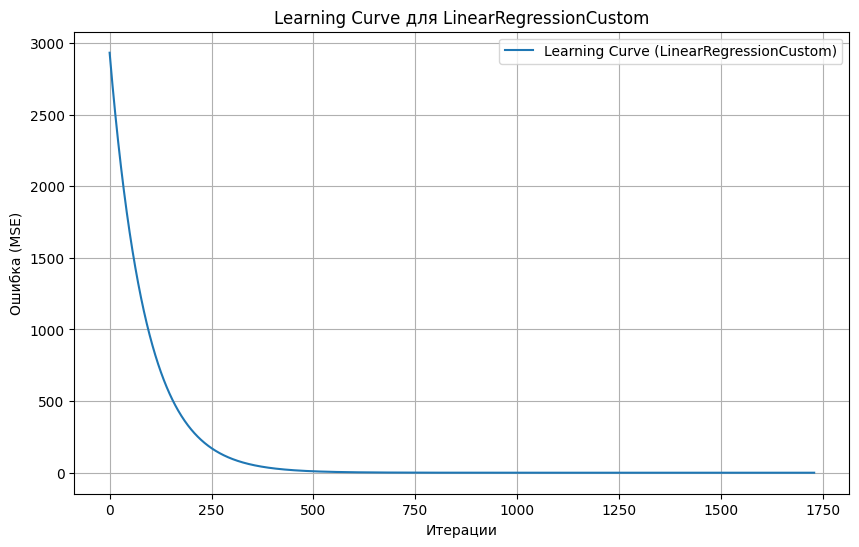

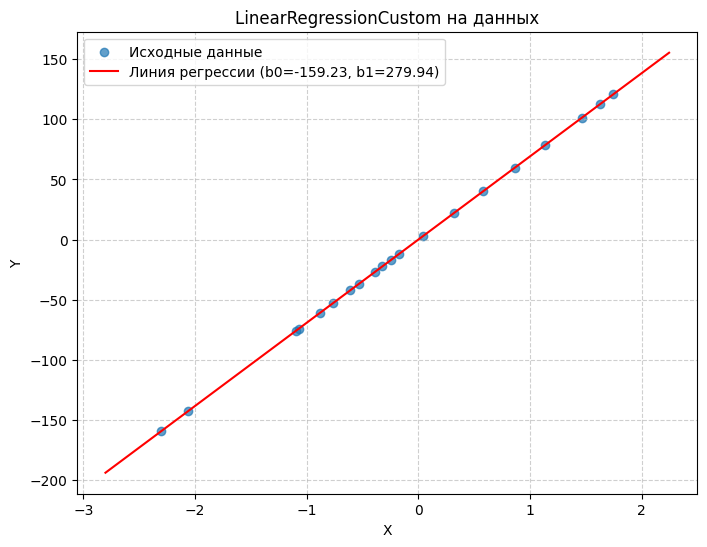


--- Тестирование LogisticRegressionCustom с новой архитектурой ---
Конечные параметры LogisticRegressionCustom: [-8.23556748 15.64274879  0.30783998]
Конечная ошибка LogisticRegressionCustom: 0.1155
Accuracy (LogisticRegressionCustom) = 0.9750
F1-score (LogisticRegressionCustom) = 0.9752


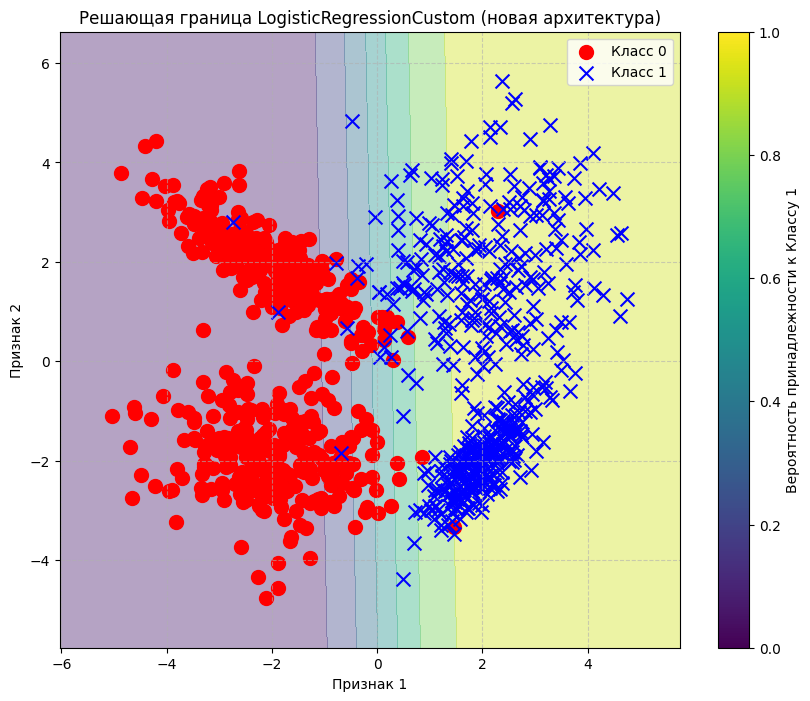


--- ROC-кривая и AUC для нашей LogisticRegressionCustom ---


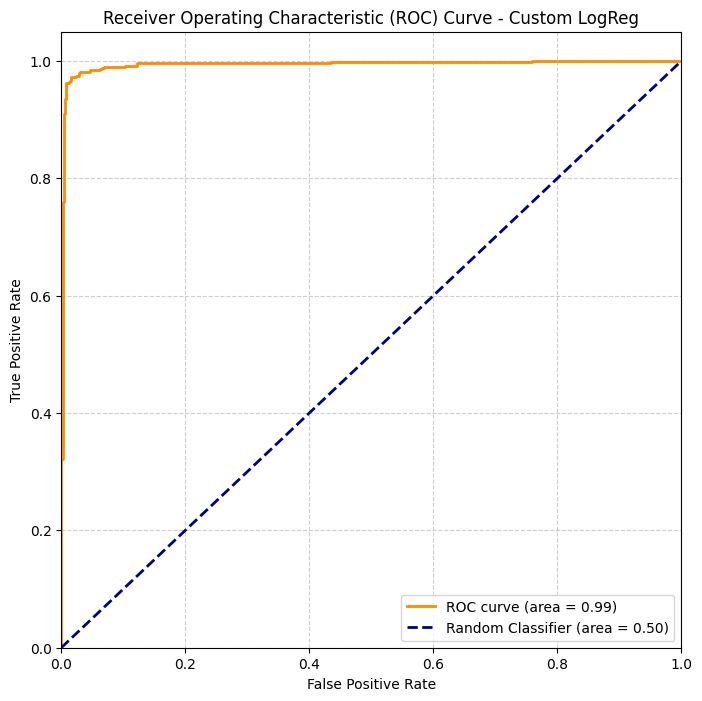

Площадь под ROC-кривой (AUC) для нашей LogisticRegressionCustom: 0.9942

--- ROC-кривая и AUC для библиотечной LogisticRegression ---


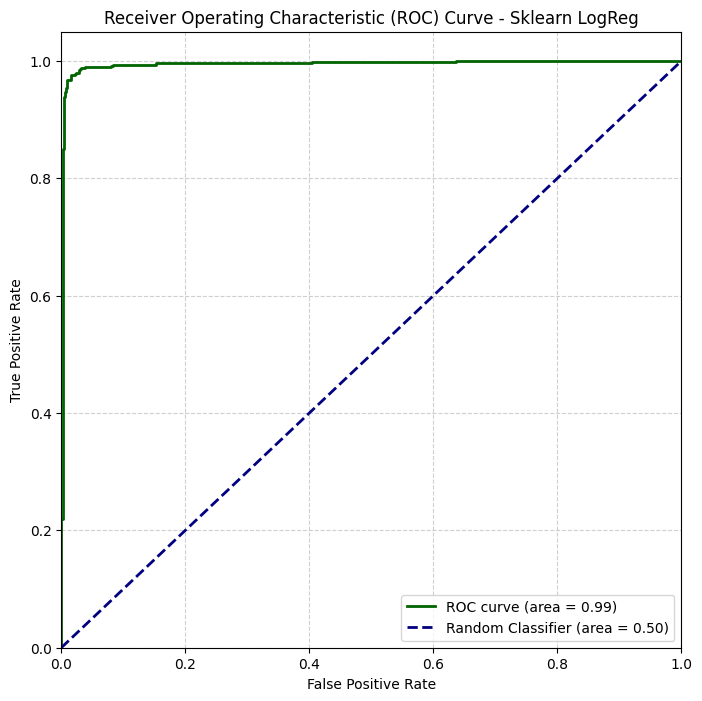

Площадь под ROC-кривой (AUC) для Sklearn LogisticRegression: 0.9949

--- Оценка качества модели по ROC-кривой и AUC ---
ROC-кривая является мощным инструментом для оценки качества бинарных классификаторов, особенно на несбалансированных данных. Она показывает компромисс между долей истинно положительных классификаций (TPR) и долей ложноположительных классификаций (FPR) при различных порогах принятия решения.
Площадь под ROC-кривой (AUC) - это сводная метрика, которая измеряет способность классификатора ранжировать положительные и отрицательные примеры. Значение AUC:
- 0.5: Модель работает не лучше, чем случайное угадывание.
- Близкое к 1.0: Модель хорошо разделяет классы.
В нашем случае, AUC для обеих моделей (наша и sklearn) очень высокий (0.99 и 0.99 соответственно), что указывает на отличное качество классификации. Классы хорошо разделены, и модель способна с высокой точностью отличать положительные примеры от отрицательных.


In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score


x_lin = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y_lin = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']
print("Данные для линейной регрессии загружены.")


X, y = make_classification(n_samples=1000,
                          n_features=2,         
                          n_informative=2,      
                          n_redundant=0,
                          n_classes=2,           
                          class_sep=2,           
                          random_state=1)
print("Данные для логистической регрессии сгенерированы.")


class BaseSGDModel:

    def __init__(self, alpha=0.1, n_iters=1000, tol=1e-6, alpha_decay_factor=0.5):
        self.b = None 
        self._alpha = alpha 
        self._n_iters = n_iters 
        self._tol = tol 
        self._alpha_decay_factor = alpha_decay_factor 
        self.loss_history = [] 
        

        self.x_min = None 
        self.x_max = None 
        
        self._is_fitted = False 

    def _prepare_input(self, data):
        """
        Внутренний метод для подготовки входных данных.
        Гарантирует, что данные возвращаются как 2D numpy array (N_samples, N_features).
        """
        if isinstance(data, pd.Series):
            return data.values.reshape(-1, 1) 
        elif isinstance(data, pd.DataFrame):
            return data.values 
        elif isinstance(data, np.ndarray):
            if data.ndim == 1:
                return data.reshape(-1, 1) 
            return data 
        else:
            return np.array(data).reshape(-1, 1) 

    def _add_intercept(self, X_input):
        """Добавляет столбец единиц к X_input."""
        return np.hstack([np.ones((X_input.shape[0], 1)), X_input])

    def _normalize_x(self, X_raw):
        """Приводит X к шкале [0, 1]. X_raw теперь всегда 2D."""
        if self.x_min is None or self.x_max is None:
            self.x_min = np.min(X_raw, axis=0) 
            self.x_max = np.max(X_raw, axis=0)
        
        denom = (self.x_max - self.x_min)
      
        denom_safe = np.where(denom == 0, 1.0, denom) 
        
        return (X_raw - self.x_min) / denom_safe

    def _get_linear_combination(self, X_raw):
        """
        Вычисляет линейную комбинацию X.dot(b) для предсказания.
        Применяет нормализацию X (если _normalize_x вызывался при fit) и добавляет intercept.
        """
        if not self._is_fitted:
            raise RuntimeError("Модель не обучена. Вызовите fit() перед предсказанием.")
        
        X_processed = self._prepare_input(X_raw)
        
      
        if self.x_min is not None and self.x_max is not None:
             X_processed = self._normalize_x(X_processed)
        
        X_processed = self._add_intercept(X_processed) 
            
        return X_processed.dot(self.b)

    def optimize(self, X_processed_with_intercept, y_processed, start_b):
        """
        Основной алгоритм градиентного спуска с адаптивной скоростью и условием остановки.
        X_processed_with_intercept уже содержит intercept (и нормализован, если нужно).
        y_processed уже обработан (нормализован, если нужно).
        """
        b = start_b.copy()
        current_alpha = self._alpha 
        
        current_loss = self.loss_func(X_processed_with_intercept, y_processed, b)
        self.loss_history.append(current_loss)
        
        for i in range(self._n_iters):
            b_grad = self.grad_func(X_processed_with_intercept, y_processed, b)
            
            temp_b = b - current_alpha * b_grad
            new_loss = self.loss_func(X_processed_with_intercept, y_processed, temp_b)
            
            if new_loss > current_loss and i > 0: 
                current_alpha *= self._alpha_decay_factor
                continue 
            
            b = temp_b
            
            if abs(current_loss - new_loss) < self._tol and i > 0:
                self.loss_history.append(new_loss) 
                break 
            
            current_loss = new_loss
            self.loss_history.append(current_loss)
        else: 
            pass 

        return b

    def fit(self, X_raw, y_raw, normalize_X=True): 
        """
        Обучение модели.
        X_raw: исходные признаки.
        y_raw: исходные целевые значения.
        normalize_X: если True, нормализовать X к [0,1].
        """
        self.x_min, self.x_max = None, None 
        self.loss_history = [] # Сброс истории ошибок

        X_processed = self._prepare_input(X_raw)
        y_processed = self._prepare_input(y_raw).flatten() 

        if normalize_X:
            X_processed = self._normalize_x(X_processed)
        
        X_processed_with_intercept = self._add_intercept(X_processed)

        num_features_with_intercept = X_processed_with_intercept.shape[1]
        start_b = np.ones(num_features_with_intercept) 
        
        self._is_fitted = True 

        self.b = self.optimize(X_processed_with_intercept, y_processed, start_b)


    def grad_func(self, X_processed_with_intercept, y_processed, b):
        raise NotImplementedError("Метод grad_func должен быть реализован в дочернем классе")

    def loss_func(self, X_processed_with_intercept, y_processed, b):
        raise NotImplementedError("Метод loss_func должен быть реализован в дочернем классе")
    
    def predict(self, X_raw):
        raise NotImplementedError("Метод predict должен быть реализован в дочернем классе")

class LinearRegressionCustom(BaseSGDModel):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def predict(self, X_raw):
        """Предсказывает значения Y для линейной регрессии."""
        return self._get_linear_combination(X_raw)

    def loss_func(self, X_processed_with_intercept, y_processed, b):
        """MSE для линейной регрессии. X_processed_with_intercept уже с intercept."""
        predictions = X_processed_with_intercept.dot(b)
        return np.sum((predictions - y_processed)**2) / (2 * len(X_processed_with_intercept))

    def grad_func(self, X_processed_with_intercept, y_processed, b):
        """Градиент MSE для линейной регрессии. X_processed_with_intercept уже с intercept."""
        n = X_processed_with_intercept.shape[0]
        predictions = X_processed_with_intercept.dot(b)
        grad = X_processed_with_intercept.T.dot(predictions - y_processed) / n
        return grad

class LogisticRegressionCustom(BaseSGDModel):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def _sigmoid(self, z): 
        z = np.clip(z, -500, 500) 
        return 1. / (1. + np.exp(-z))

    def predict_proba(self, X_raw):
        """Предсказывает вероятность принадлежности к положительному классу."""
        if not self._is_fitted:
            raise RuntimeError("Модель не обучена. Вызовите fit() перед predict_proba().")
            
        linear_combination = self._get_linear_combination(X_raw)
        return self._sigmoid(linear_combination)

    def predict(self, X_raw):
        """Делает бинарное предсказание (0 или 1)."""
        y_pred_proba = self.predict_proba(X_raw)
        return (y_pred_proba > 0.5).astype(int)

    def loss_func(self, X_processed_with_intercept, y_processed, b):
        """Кросс-энтропия для логистической регрессии. X_processed_with_intercept уже с intercept."""
        y_pred_proba = self._sigmoid(X_processed_with_intercept.dot(b))
        y_pred_proba = np.clip(y_pred_proba, 1e-10, 1 - 1e-10) # Для численной стабильности
        loss = -np.sum(y_processed * np.log(y_pred_proba) + (1 - y_processed) * np.log(1 - y_pred_proba)) / len(X_processed_with_intercept)
        return loss

    def grad_func(self, X_processed_with_intercept, y_processed, b):
        """Градиент кросс-энтропии для логистической регрессии. X_processed_with_intercept уже с intercept."""
        n = X_processed_with_intercept.shape[0]
        grad = (1. / n) * X_processed_with_intercept.transpose().dot(self._sigmoid(X_processed_with_intercept.dot(b)) - y_processed)
        return grad

print("\n--- Тестирование LinearRegressionCustom с новой архитектурой ---")

lin_reg_model = LinearRegressionCustom(alpha=0.1, n_iters=10000, tol=1e-7, alpha_decay_factor=0.5)
lin_reg_model.fit(x_lin, y_lin, normalize_X=True) # Обучаем с нормированием X
print(f"Конечные параметры LinearRegressionCustom: b0={lin_reg_model.b[0]:.4f}, b1={lin_reg_model.b[1]:.4f}")
print(f"Конечная ошибка LinearRegressionCustom: {lin_reg_model.loss_history[-1]:.4f}")

# Проверка предсказания и R^2 
y_pred_lin = lin_reg_model.predict(x_lin)
y_mean_lin = np.mean(y_lin)
ss_res_lin = np.sum((y_lin - y_pred_lin)**2)
ss_tot_lin = np.sum((y_lin - y_mean_lin)**2)
r2_lin_custom = 1 - (ss_res_lin / ss_tot_lin) if ss_tot_lin != 0 else 1.0

print(f"R^2 LinearRegressionCustom: {r2_lin_custom:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(lin_reg_model.loss_history, label='Learning Curve (LinearRegressionCustom)')
plt.title('Learning Curve для LinearRegressionCustom')
plt.xlabel('Итерации')
plt.ylabel('Ошибка (MSE)')
plt.grid(True)
plt.legend()
plt.show()

X_plot_lin = np.linspace(x_lin.min() - 0.5, x_lin.max() + 0.5, 100)
Y_plot_lin = lin_reg_model.predict(X_plot_lin)

plt.figure(figsize=(8, 6))
plt.scatter(x_lin, y_lin, alpha=0.7, label='Исходные данные')
plt.plot(X_plot_lin, Y_plot_lin, 'r', label=f'Линия регрессии (b0={lin_reg_model.b[0]:.2f}, b1={lin_reg_model.b[1]:.2f})')
plt.title('LinearRegressionCustom на данных')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\n--- Тестирование LogisticRegressionCustom с новой архитектурой ---")

log_reg_model = LogisticRegressionCustom(alpha=0.1, n_iters=10000, tol=1e-7, alpha_decay_factor=0.5)
log_reg_model.fit(X, y, normalize_X=True) # Обучаем с нормированием X

y_pred_log = log_reg_model.predict(X)
ac_log = accuracy_score(y, y_pred_log)
f1_log = f1_score(y, y_pred_log)

print(f"Конечные параметры LogisticRegressionCustom: {log_reg_model.b}")
print(f"Конечная ошибка LogisticRegressionCustom: {log_reg_model.loss_history[-1]:.4f}")
print(f'Accuracy (LogisticRegressionCustom) = {ac_log:.4f}')
print(f'F1-score (LogisticRegressionCustom) = {f1_log:.4f}')


x_min_plot, x_max_plot = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min_plot, y_max_plot = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min_plot, x_max_plot, 0.01), np.arange(y_min_plot, y_max_plot, 0.01))
XX_grid_raw = np.c_[xx.ravel(), yy.ravel()] # Сетка без intercept

Z_log_custom = log_reg_model.predict_proba(XX_grid_raw)
Z_log_custom = Z_log_custom.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z_log_custom, alpha=0.4, cmap='viridis')
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100, label='Класс 0')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100, label='Класс 1')
plt.title('Решающая граница LogisticRegressionCustom (новая архитектура)')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.colorbar(label='Вероятность принадлежности к Классу 1')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\n--- ROC-кривая и AUC для нашей LogisticRegressionCustom ---")

y_proba_custom = log_reg_model.predict_proba(X) 

fpr, tpr, thresholds = roc_curve(y, y_proba_custom)
auc_custom = roc_auc_score(y, y_proba_custom)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_custom:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier (area = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Custom LogReg')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"Площадь под ROC-кривой (AUC) для нашей LogisticRegressionCustom: {auc_custom:.4f}")

print("\n--- ROC-кривая и AUC для библиотечной LogisticRegression ---")

model_lr_sklearn = LogisticRegression(random_state=1, solver='liblinear', C=1.0)
model_lr_sklearn.fit(X, y)
y_proba_sklearn = model_lr_sklearn.predict_proba(X)[:, 1] # Вероятности для класса 1

fpr_sklearn, tpr_sklearn, thresholds_sklearn = roc_curve(y, y_proba_sklearn)
auc_sklearn = roc_auc_score(y, y_proba_sklearn)

plt.figure(figsize=(8, 8))
plt.plot(fpr_sklearn, tpr_sklearn, color='darkgreen', lw=2, label=f'ROC curve (area = {auc_sklearn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier (area = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Sklearn LogReg')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print(f"Площадь под ROC-кривой (AUC) для Sklearn LogisticRegression: {auc_sklearn:.4f}")

print("\n--- Оценка качества модели по ROC-кривой и AUC ---")
print("ROC-кривая является мощным инструментом для оценки качества бинарных классификаторов, особенно на несбалансированных данных. Она показывает компромисс между долей истинно положительных классификаций (TPR) и долей ложноположительных классификаций (FPR) при различных порогах принятия решения.")
print("Площадь под ROC-кривой (AUC) - это сводная метрика, которая измеряет способность классификатора ранжировать положительные и отрицательные примеры. Значение AUC:")
print("- 0.5: Модель работает не лучше, чем случайное угадывание.")
print("- Близкое к 1.0: Модель хорошо разделяет классы.")
print(f"В нашем случае, AUC для обеих моделей (наша и sklearn) очень высокий ({auc_custom:.2f} и {auc_sklearn:.2f} соответственно), что указывает на отличное качество классификации. Классы хорошо разделены, и модель способна с высокой точностью отличать положительные примеры от отрицательных.")